<a href="https://colab.research.google.com/github/boangri/neuraluniversity/blob/master/HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию №1 "Введение в нейронные сети" 26.07.2020

Борис Грибовский <xinu@yandex.ru>

## LIGHT, variant 1:

In [ ]:
# 1. Импорт библиотек
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 

In [ ]:
np.random.seed = 42 # выбор профессионалов :)

In [ ]:
# 2. Загрузка базы MNIST
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 3. Нормирование и преобразование x_train и y_train.
# Преобразуем двумерное представление в одномерное:
# 28x28 -> 784:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
# Нормализуем входные картинки
x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32') 
x_test = x_test / 255 
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
# 4. Создание нейронной сети.
# Создаем модель из 2-х слоев с 800 и 400 нейронами.
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))
# Компилляция:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5. Обучение нейронной сети.
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 6ms/step - loss: 0.2323 - accuracy: 0.9316 - val_loss: 0.1228 - val_accuracy: 0.9626
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.0896 - val_accuracy: 0.9712
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0966 - val_accuracy: 0.9728
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.1075 - val_accuracy: 0.9711
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0857 - val_accuracy: 0.9768
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0945 - val_accuracy: 0.9757
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0930 - val_accuracy: 0.9785
Epoch 

In [ ]:
# Тестируем модель
prediction = model.predict(x_test)

In [ ]:
# Преобразуем hot_one представления в числа от 0 до 9:
pred_n = np.array([np.argmax(x) for x in prediction])
test_n = np.array([np.argmax(x) for x in y_test])

In [ ]:
# Подсчитаем число верных ответов
count = 0
for i in range(len(pred_n)):
  count += (pred_n[i] == test_n[i])
print(count)

9787


## LIGHT, variant 2:

In [ ]:
import time
import pandas as pd

In [ ]:
sizes = [10, 100, 5000]
activations = ['relu', 'linear']
batch_sizes = [1, 10, 100, 60000]
epochs = 10

In [ ]:
results = np.zeros((len(sizes), len(activations), len(batch_sizes))) # Результаты тестов (точность)
times = np.zeros((len(sizes), len(activations), len(batch_sizes))) # Время тестирования
test_n = np.array([np.argmax(x) for x in y_test]) # Преобразуем hot_one в числа

In [ ]:
%%time
for i in range(len(sizes)):
  for j in range(len(activations)):
    for k in range(len(batch_sizes)):
      start_time = time.time()
      model = Sequential()
      model.add(Dense(sizes[i], input_dim=784, activation=activations[j]))
      model.add(Dense(10, activation="softmax"))
      model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
      model.fit(x_train, y_train, batch_size=batch_sizes[k], epochs=epochs, verbose=0, validation_split=0.2)
      prediction = model.predict(x_test)
      pred_n = np.array([np.argmax(x) for x in prediction])
      # Подсчитаем число верных ответов
      count = 0
      for l in range(len(pred_n)):
        count += (pred_n[l] == test_n[l])
      print(f"size={sizes[i]} activation={activations[j]} batch_size={batch_sizes[k]} valid_answers={count}")
      results[i, j, k] = count/len(test_n)*100. # Процент верных ответов
      times[i, j, k] = time.time() - start_time

size=10 activation=relu batch_size=1 valid_answers=9237
size=10 activation=relu batch_size=10 valid_answers=9361
size=10 activation=relu batch_size=100 valid_answers=9268
size=10 activation=relu batch_size=60000 valid_answers=1607
size=10 activation=linear batch_size=1 valid_answers=9177
size=10 activation=linear batch_size=10 valid_answers=9234
size=10 activation=linear batch_size=100 valid_answers=9269
size=10 activation=linear batch_size=60000 valid_answers=3772
size=100 activation=relu batch_size=1 valid_answers=9745
size=100 activation=relu batch_size=10 valid_answers=9723
size=100 activation=relu batch_size=100 valid_answers=9749
size=100 activation=relu batch_size=60000 valid_answers=7434
size=100 activation=linear batch_size=1 valid_answers=9158
size=100 activation=linear batch_size=10 valid_answers=9186
size=100 activation=linear batch_size=100 valid_answers=9263
size=100 activation=linear batch_size=60000 valid_answers=7792
size=5000 activation=relu batch_size=1 valid_answers

In [ ]:
# Таблички с результатами.
df_relu = pd.DataFrame(results[:,0,:], columns=batch_sizes, index=sizes)
df_linear = pd.DataFrame(results[:,1,:], columns=batch_sizes, index=sizes)
df_times = pd.DataFrame(times[:,0,:], columns=batch_sizes, index=sizes)

In [ ]:
df_relu # Процент правильных ответов с активацией relu

,1,10,100,60000
10,92.37,93.61,92.68,16.07
100,97.45,97.23,97.49,74.34
5000,97.69,97.69,97.91,90.35


In [ ]:
df_linear # Процент правильных ответов с активацией linear

,1,10,100,60000
10,91.77,92.34,92.69,37.72
100,91.58,91.86,92.63,77.92
5000,86.81,88.42,91.35,88.53


In [ ]:
df_times # время выполнения обучения и тестирования (сек)

,1,10,100,60000
10,840.950983,90.005464,11.215810,2.343234
100,830.708318,90.140829,11.085702,2.174289
5000,1162.582226,149.634776,20.388566,6.426854


### Выводы:
Было перебрано 24 варианта гиперпараметров при фиксированном числе эпох (10) В качестве метрики использовалось количество верных ответов на тестовой (10000 образцов) выборке.

1.   Лучший результат - 97.91% - был получен на 5000 нейронах, размере батча 100 и функции активации relu.
2.   Время обучения сильно зависит от размера батча - чем больше батч сайз, тем скорее идет обучение (при равном числе эпох)
3.   Результат улучшается при увеличении числа нейронов, но не сильно. Например при увеличении со 100 до 5000 выигрыш составил 97.49% -> 97.91%
4.   Активация relu показала лучшие результаты по сравнению с linear (при прочих равных условиях)
1.   Наилучшее результаты достигаются на размерах батча в 10 и 100. Наихудший результат дал размер батча 60000, однако сравние не совсем корректное, так как обучение происходило очень быстро, корректнее было бы сравнивать результаты полученные с одинаковым временем обучения.
2.   Полный перебор 24 гиперпараметров занял 2h 11min при включенном GPU.





## PRO

In [ ]:
# Дополнительные библиотеки для PRO
from google.colab import files 
import matplotlib.pyplot as plt 
from PIL import Image 
%matplotlib inline 

In [ ]:
# Пересоздание нейронной сети. (Затерли модель 2-м вариантом Light)
# Создаем модель из 2-х слоев с 800 и 400 нейронами.
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))
# Компилляция:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_52 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5. Обучение нейронной сети.
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=0, validation_split=0.2)

In [ ]:
# Сохраним параметры на всякий случай
model.save_weights('model.h5')

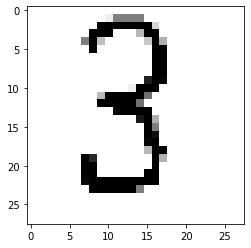

In [ ]:
# Распознаем цифру, созданную в граф редакторе
img = image.load_img('3a.png', target_size=(28, 28), color_mode='grayscale') 
# Преобразуем изображение в массив
x = image.img_to_array(img)
# Нарисуем цифру
plt.imshow(Image.fromarray(x.reshape(28,28)).convert('RGBA')) 
plt.show()

In [ ]:
# Инверсия цвета, нормализуем данные и преобразуем в одну строку
x = (255. - x)/255.
x = x.reshape(1,784)

In [ ]:
# Применим модель для распознавания
y = model.predict(x)
print(y)
# Преобразуем hot_one в число
print(np.argmax(y))


[[3.8393784e-14 1.5576580e-08 2.0615880e-05 9.9997878e-01 2.5871655e-12
  1.5471606e-07 1.2922707e-11 3.4822197e-13 4.7005963e-07 2.6535860e-11]]
3


Модель уверенно (99.9%) распознала цифру 3.

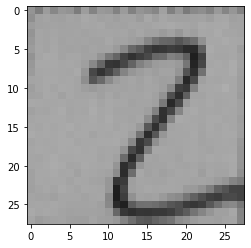

In [ ]:
# Теперь тоо же самое с фотографией цифры
img = image.load_img('2a.png', target_size=(28, 28), color_mode='grayscale') 
# Преобразуем изображение в массив
x = image.img_to_array(img)
# Нарисуем цифру
plt.imshow(Image.fromarray(x.reshape(28,28)).convert('RGBA')) 

In [ ]:
# Нормализуем данные и преобразуем в одну строку
x = (255. - x)/255.
x = x.reshape(1,784)

In [ ]:
# Применим модель для распознавания
y = model.predict(x)
print(y)
# Преобразуем hot_one в число
print(np.argmax(y))

[[1.6152220e-04 3.4357869e-05 6.7414850e-01 1.2938841e-01 3.0804785e-08
  2.4913491e-03 1.7937594e-04 2.7073040e-03 1.9013280e-01 7.5630943e-04]]
2


На этот раз модель распознала без предобработки, но как-то неуверенно (67%). На другом прогоне выдавался ошибочный ответ. Поэтому сделаем предобработку.

In [ ]:
# Предобработка - уберем фон.
x -= x.min() # обнуляем фон
x /= x.max() # доводим максимум до 1 

In [ ]:
# Применим модель для распознавания
y = model.predict(x)
print(y)
# Преобразуем hot_one в число
print(np.argmax(y))

[[1.3020014e-10 1.5060526e-11 9.9466538e-01 5.3283414e-03 9.2725954e-19
  2.4360897e-10 3.7090865e-13 1.1361567e-06 5.1381257e-06 2.2634090e-09]]
2


После дополнительной предобработки модель уверенно (99.4%) выдала верный результат.